# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name:  Viz Visionaries
Created by NAMES (SJSU IDs) : 016115515, 
Last updated: DATE  
Briefly describe your dataset: The LendingClub dataset contains information about loan applicants, their financial backgrounds, and repayment outcomes. Each row represents a loan application, with the key target variable loan_status (Fully Paid, Current, Charged-off). Features include loan details (amount, term, interest rate, grade), borrower profile (income, employment, home ownership), credit history (dti, revolving balance, accounts), and purpose. Applicants labeled Charged-off are treated as defaulters, making this dataset useful for risk analytics, exploratory analysis, and predictive modeling.

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

### Q1: Show the number of missing data in each column of the dataframe

In [28]:
import pandas as pd
import os

# Path to the folder containing the real CSV
data_path = "/Users/diyadoshi/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv"

df = pd.read_csv(data_path)

print(df.shape)
df.head()

/var/folders/pw/rtr07675107fvmf8dp_fk8qh0000gn/T/ipykernel_11909/3942739072.py:7: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


(2260701, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data)


member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_end_date                             2249784
hardship_start_date                           2249784
hardship_type                                 2249784
                                               ...   
policy_code                                        33
revol_bal                                          33
fico_range_high                                    33
fico_range_low                                     33
id                                                  0
Length: 151, dtype: int64


In [30]:
drop_cols = [
    "member_id",
    "orig_projected_additional_accrued_interest",
    "hardship_end_date", "hardship_start_date", "hardship_type",
    "hardship_reason", "hardship_status",
    "deferral_term", "hardship_last_payment_amount",
    "hardship_payoff_balance_amount"
]
df = df.drop(columns=drop_cols)


### Q2: Show the data type for each column of the dataframe

In [31]:
# Your code here . . .
print(df.dtypes)
print(df.info())

id                        object
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
term                      object
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 141, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 141 entries, id to settlement_term
dtypes: float64(108), object(33)
memory usage: 2.4+ GB
None


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

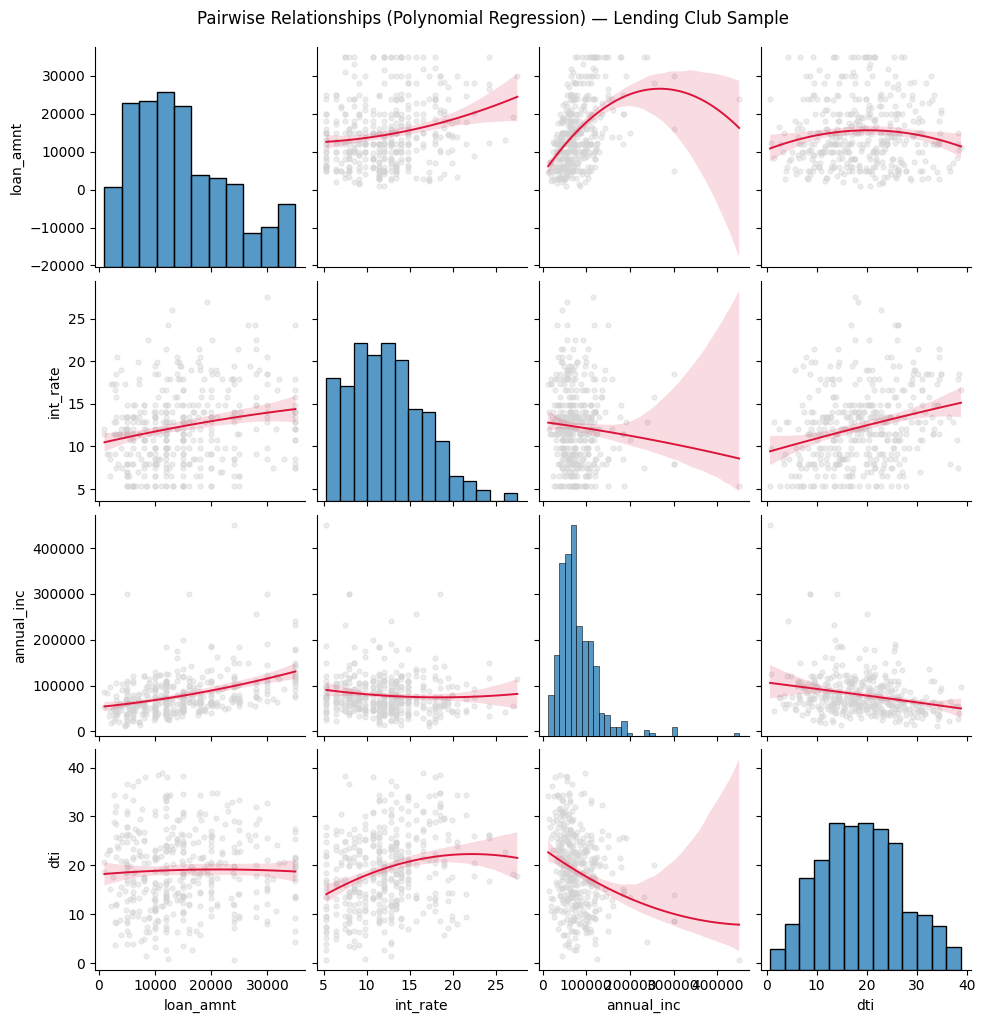

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = [c for c in ["loan_amnt", "int_rate", "annual_inc", "dti", "revol_bal"] if c in df.columns][:4]
plot_df = df[cols].dropna().sample(n=min(400, len(df)), random_state=42)

sns.pairplot(
    plot_df,
    kind="reg",
    plot_kws={
        "order": 2,
        "scatter_kws": {"color": "lightgray", "alpha": 0.4, "s": 12},
        "line_kws": {"color": "crimson", "linewidth": 1.4}
    },
    diag_kind="hist"
)
plt.suptitle("Pairwise Relationships (Polynomial Regression) — Lending Club Sample", y=1.02)
plt.show()


### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

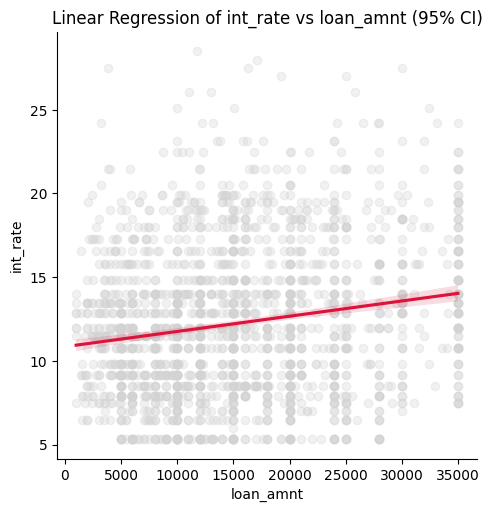

In [ ]:
# Your code here . . .

import seaborn as sns
import matplotlib.pyplot as plt


xcol, ycol = "loan_amnt", "int_rate"  


plot_df = df[[xcol, ycol]].dropna().sample(n=min(5000, len(df)), random_state=42)

sns.lmplot(
    data=plot_df,
    x=xcol, y=ycol,
    scatter_kws={"alpha": 0.3, "color": "lightgray"},
    line_kws={"color": "crimson"}
)

plt.title(f"Linear Regression of {ycol} vs {xcol} (95% CI)")
plt.xlabel(xcol)
plt.ylabel(ycol)
plt.show()


### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

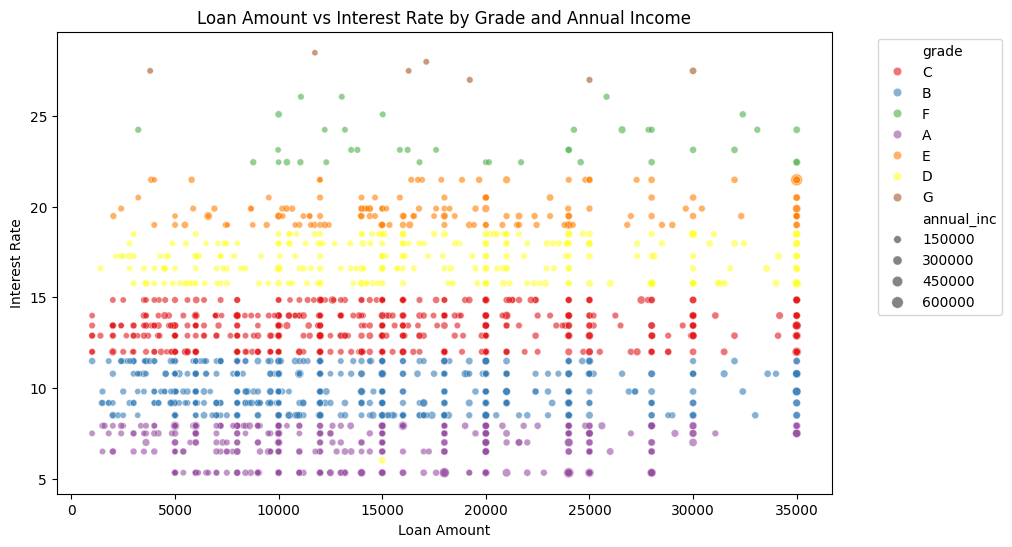

In [ ]:
# Your code here . . .

import seaborn as sns
import matplotlib.pyplot as plt


plot_df = df[['loan_amnt', 'int_rate', 'grade', 'annual_inc']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x="loan_amnt",
    y="int_rate",
    hue="grade",
    size="annual_inc",
    alpha=0.6,
    palette="Set1"
)

plt.title("Loan Amount vs Interest Rate by Grade and Annual Income")
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

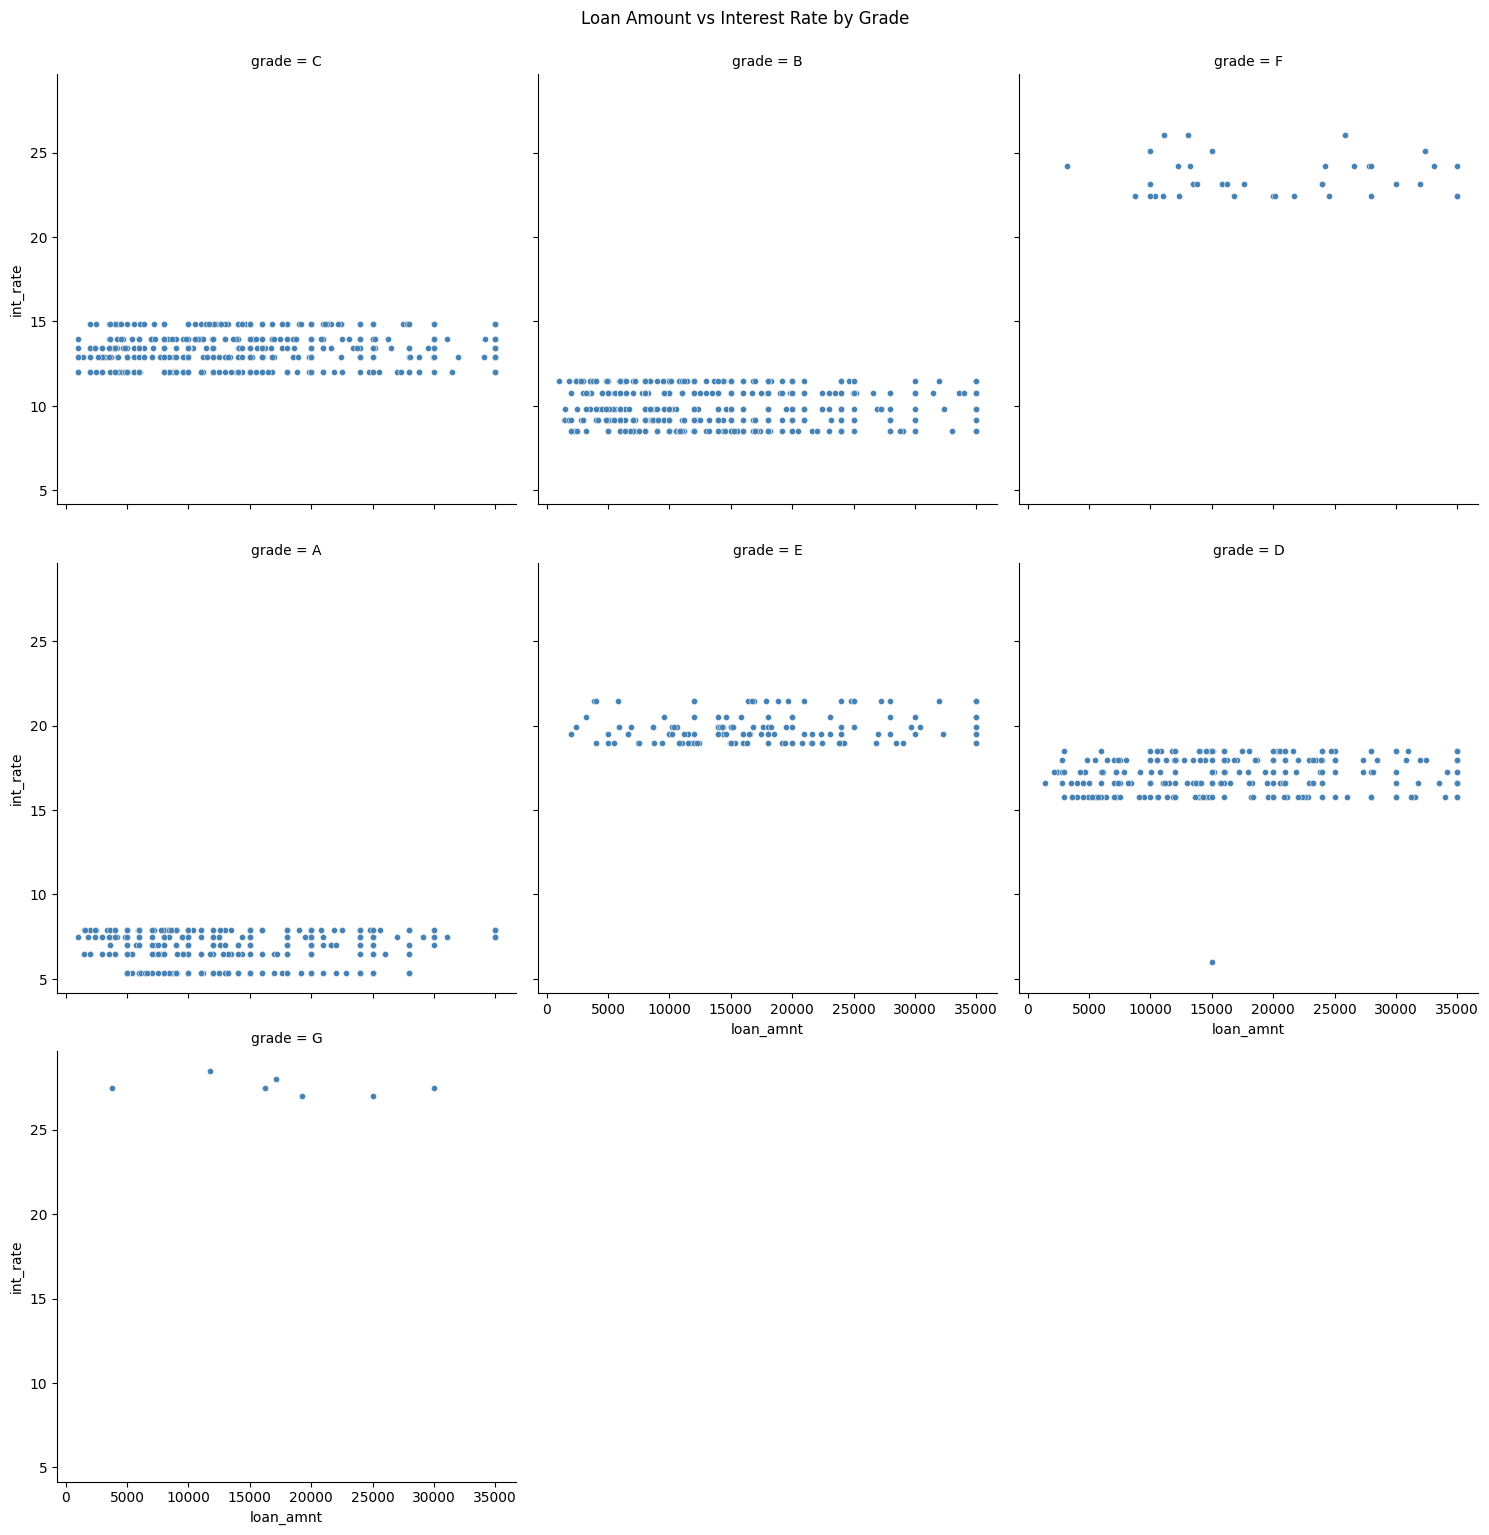

In [ ]:
# Your code here . . .

import seaborn as sns
import matplotlib.pyplot as plt


g = sns.relplot(
    data=df,
    x="loan_amnt",
    y="int_rate",
     col="grade",        # the additional feature/category
    col_wrap=3,         # 3 plots per row
    height=5,           # height of each subplot
     s=20,               # size of each point
    kind="scatter",
    color="steelblue"  
)

g.fig.suptitle("Loan Amount vs Interest Rate by Grade", y=1.02)
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("lending_club_csv/accepted_2007_to_2018q4.csv", nrows=2000)
print(df.shape)


(2000, 151)
